# **Chapter 9 Supervised Learning**
## Implementation of a Regression problem

We have a problem of predicting the prices of the house given some features such as size, number of rooms and many more. So let us get started:

### 1. Gathering data: 
We don’t need to manually collect the data for past sales of houses. Luckily there are some good people who do it for us and make these datasets available for us to use. 

We are going to import all the necessary libraries such as Pandas and NumPy.Next, we will load the dataset directly from the sklearn library into a pandas DataFrame.

#### Importing require libraries

In [180]:
# import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


#### Reading Dataset

In [181]:
# load dataset from sklearn 
boston_dataset = datasets.load_boston()
# load datset as pandas datsframe 
data = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
data['target'] = boston_dataset.target
# print 10 sample rows
data.sample(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
363,4.22239,0.0,18.10,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,20.2,353.04,14.64,16.8
246,0.33983,22.0,5.86,0.0,0.431,6.108,34.9,8.0555,7.0,330.0,19.1,390.18,9.16,24.3
137,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4.0,437.0,21.2,394.08,14.59,17.1
236,0.52058,0.0,6.20,1.0,0.507,6.631,76.5,4.1480,8.0,307.0,17.4,388.45,9.54,25.1
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46,18.5
315,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50,16.2
140,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16,14.0
399,9.91655,0.0,18.10,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
73,0.19539,0.0,10.81,0.0,0.413,6.245,6.2,5.2873,4.0,305.0,19.2,377.17,7.54,23.4


**Defining the problem statement:**

Create a ML model which can predict the price( target ) of a house
- Target Variable: target
- features: CRIM, ZN, INDUS, CHAS, NOX, RM, etc.

**Determining the type of Machine Learning**

Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

**Looking at the distribution of Target variable**

- If target variable's distribution is too skewed then the predictive modeling will not be possible.
- Bell curve is desirable but slightly positive skew or negative skew is also fine
- When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<AxesSubplot:>

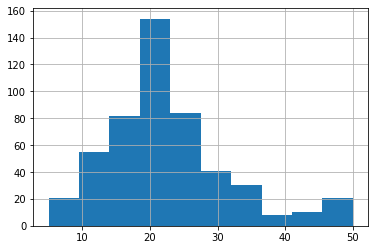

In [182]:

# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values
data['target'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

### 2. Preprocess data
#### Basic Data Exploration
This step is performed to gauge the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, **does this column affect the values of the Target variable?** For example in this case study, you will ask, does this column affect the price of the house? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python

- **head()** : This helps to see a few sample rows of the data
- **info()** : This provides the summarized information of the data
- **describe()** : This provides the descriptive statistical details of the data
- **nunique()**: This helps us to identify if a column is categorical or continuous

In [183]:
#print basic info
print(f"Contains {data.shape[0]} rows and {data.shape[1]-1} feature and contimous target variable")

Contains 506 rows and 13 feature and contimous target variable


In [184]:
# describing the feature name and attribute information
print(boston_dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Thoughts...
1. No missing value are given
2. As target value is represnted as median , there are chances that dataset contain outliers.
3. Most of the feature correlates the target value.
4. Feature have different scales.

#### Data wrangling

##### Find missing values

In [185]:
# checking for any missing value
print("Missing values for every features.")
data.isna().sum()

Missing values for every features.


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

As given there are no missing values

In [186]:
# check datatype and na values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


All data is in numeric(float64)

In [187]:
#describe dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [188]:
# check if rows are duplicate or not
print(f"There are {data.duplicated().sum()} rows in dataset.")

There are 0 rows in dataset.


**Thoughts...**
1. Dataset dosent contain any null values.
2. All features and target vatriable are numeric(float64), `CHAS` is an categorical varible.
3. Features `CHAS`, `NOX` and `ZN` have more than 50% value as zero.
4. Most of the feature contain outliers that need to fixed.
5. There are no duplicated rows



##### Visual Exploratory Data Analysis

<AxesSubplot:xlabel='target', ylabel='Density'>

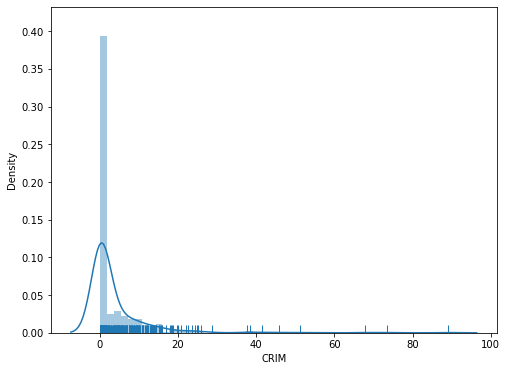

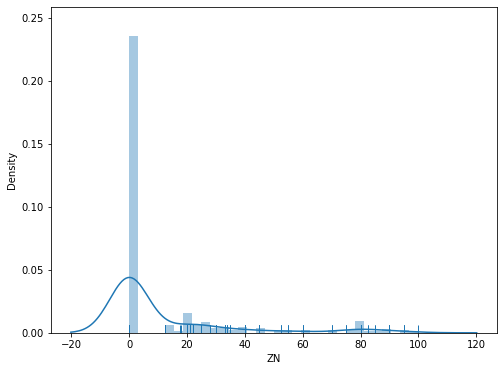

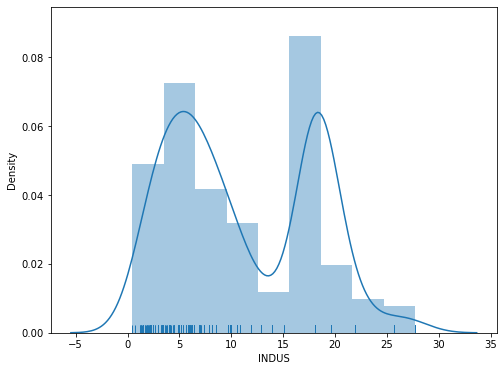

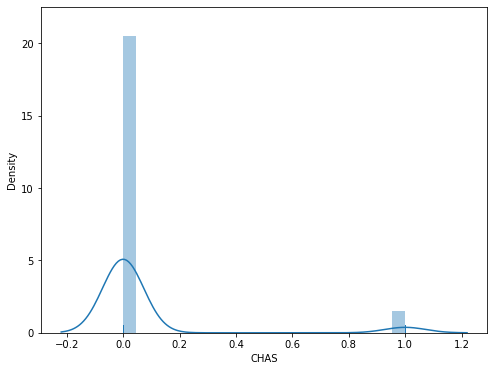

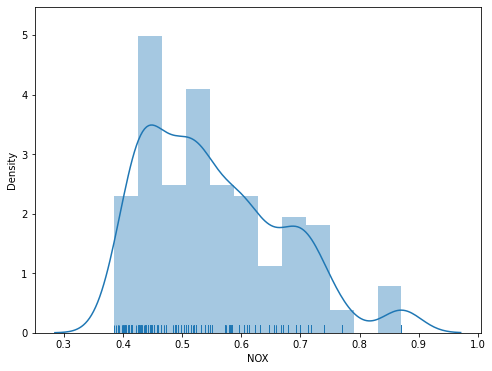

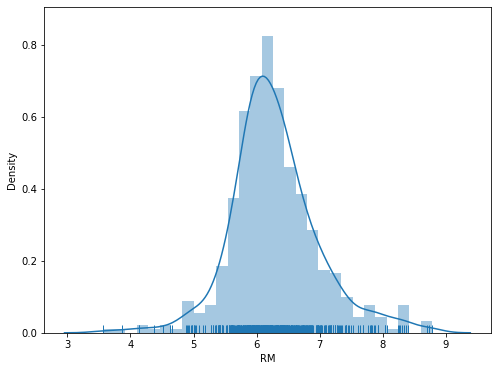

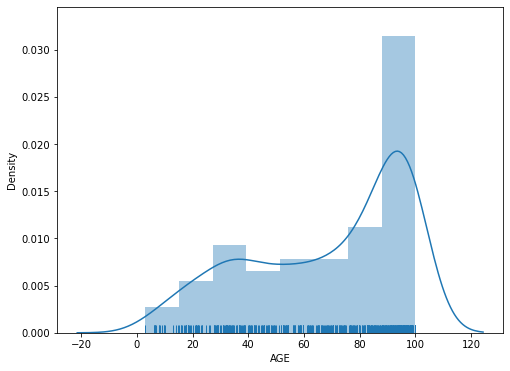

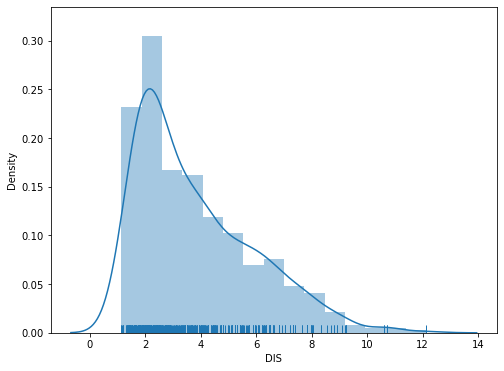

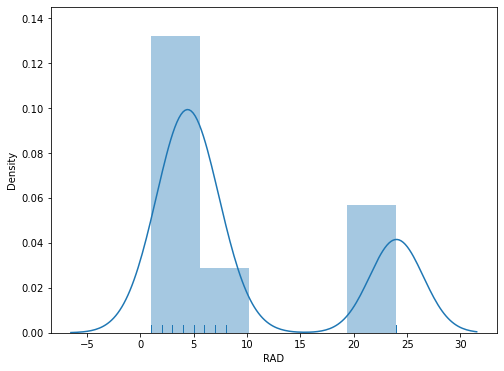

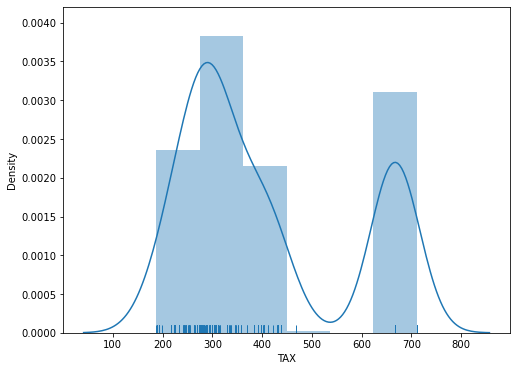

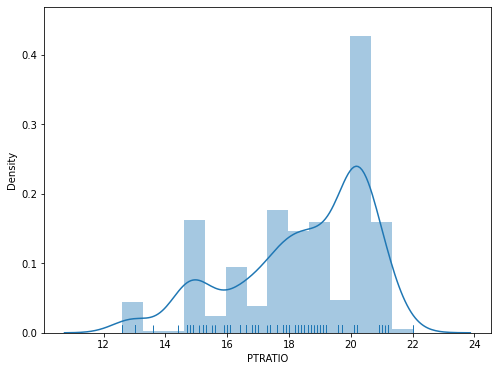

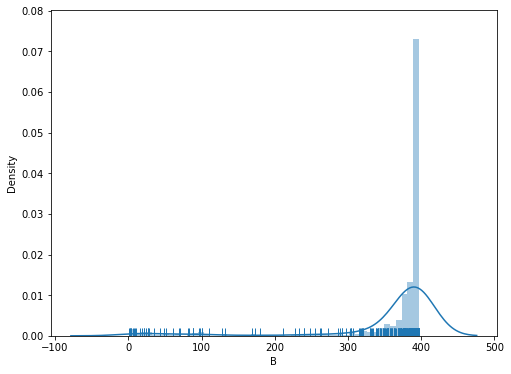

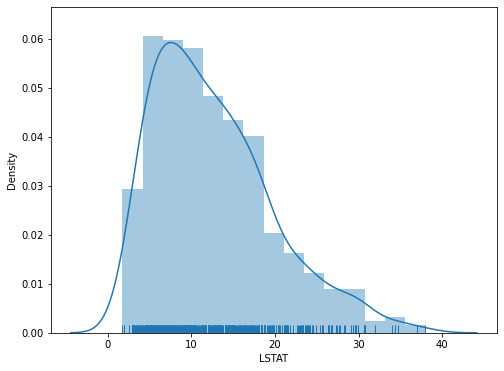

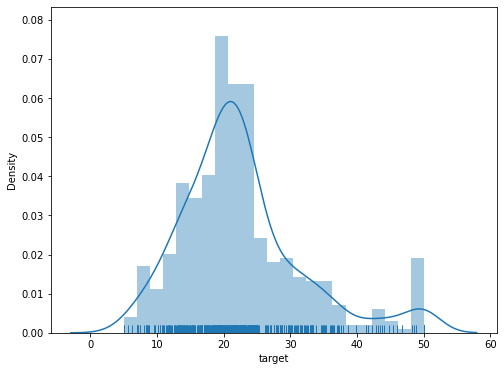

In [189]:
import seaborn as sb
plt.figure(figsize=(8, 6))
sb.distplot(data['CRIM'], rug = True)


plt.figure(figsize=(8, 6))
sb.distplot(data['ZN'], rug = True)


plt.figure(figsize=(8, 6))
sb.distplot(data['INDUS'], rug = True)


plt.figure(figsize=(8, 6))
sb.distplot(data['CHAS'], rug = True)


plt.figure(figsize=(8, 6))
sb.distplot(data['NOX'], rug = True)


plt.figure(figsize=(8, 6))
sb.distplot(data['RM'], rug = True)


plt.figure(figsize=(8, 6))
sb.distplot(data['AGE'], rug = True)


plt.figure(figsize=(8, 6))
sb.distplot(data['DIS'], rug = True)


plt.figure(figsize=(8, 6))
sb.distplot(data['RAD'], rug = True)


plt.figure(figsize=(8, 6))
sb.distplot(data['TAX'], rug = True)


plt.figure(figsize=(8, 6))
sb.distplot(data['PTRATIO'], rug = True)


plt.figure(figsize=(8, 6))
sb.distplot(data['B'], rug = True)


plt.figure(figsize=(8, 6))
sb.distplot(data['LSTAT'], rug = True)


plt.figure(figsize=(8, 6))
sb.distplot(data['target'], rug = True)


* `CRIM`, `ZN` and features are `left skewed`.
* `B` is `right skewed`.
* `target` is normally distributed.
* `CRIM`, `ZN` ,`CHAS`, `RN` ,`B` and `Target` seems to have outlier.

##### Removing Outliers and dropping columns

In [190]:
# removing Outliers
data = data[(np.abs(stats.zscore(data))<3).all(axis=1)]

In [191]:
#checking stats
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,415.000000,415.000000,415.000000,415.0,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,2.452461,9.602410,10.829687,0.0,0.547168,6.267554,67.384337,3.852640,8.684337,393.853012,18.467952,374.235373,12.275976,22.353976
std,4.897241,19.677404,6.798613,0.0,0.110428,0.611602,28.072043,1.964763,8.196802,161.196133,2.137611,51.582784,6.474602,8.077366
min,0.006320,0.000000,0.460000,0.0,0.385000,4.368000,2.900000,1.169100,1.000000,188.000000,12.600000,83.450000,1.730000,5.600000
25%,0.081005,0.000000,5.130000,0.0,0.449000,5.886000,43.550000,2.203200,4.000000,279.000000,17.400000,377.880000,7.210000,17.550000
50%,0.211610,0.000000,8.560000,0.0,0.524000,6.193000,73.900000,3.377900,5.000000,315.000000,19.000000,392.630000,11.220000,21.200000
75%,2.152115,12.500000,18.100000,0.0,0.609000,6.559500,93.700000,5.287300,8.000000,437.000000,20.200000,396.900000,16.215000,24.800000
max,28.655800,80.000000,27.740000,0.0,0.871000,8.337000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,31.990000,50.000000


* `CHAS` feture is only containing '0'. 

In [192]:
#droping CHAS feature as it only contains 0
data.drop('CHAS',axis=1, inplace=True)

In [193]:
data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,2.452461,9.602410,10.829687,0.547168,6.267554,67.384337,3.852640,8.684337,393.853012,18.467952,374.235373,12.275976,22.353976
std,4.897241,19.677404,6.798613,0.110428,0.611602,28.072043,1.964763,8.196802,161.196133,2.137611,51.582784,6.474602,8.077366
min,0.006320,0.000000,0.460000,0.385000,4.368000,2.900000,1.169100,1.000000,188.000000,12.600000,83.450000,1.730000,5.600000
25%,0.081005,0.000000,5.130000,0.449000,5.886000,43.550000,2.203200,4.000000,279.000000,17.400000,377.880000,7.210000,17.550000
50%,0.211610,0.000000,8.560000,0.524000,6.193000,73.900000,3.377900,5.000000,315.000000,19.000000,392.630000,11.220000,21.200000
75%,2.152115,12.500000,18.100000,0.609000,6.559500,93.700000,5.287300,8.000000,437.000000,20.200000,396.900000,16.215000,24.800000
max,28.655800,80.000000,27.740000,0.871000,8.337000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,31.990000,50.000000


##### Checking corelation with heatmap

[]

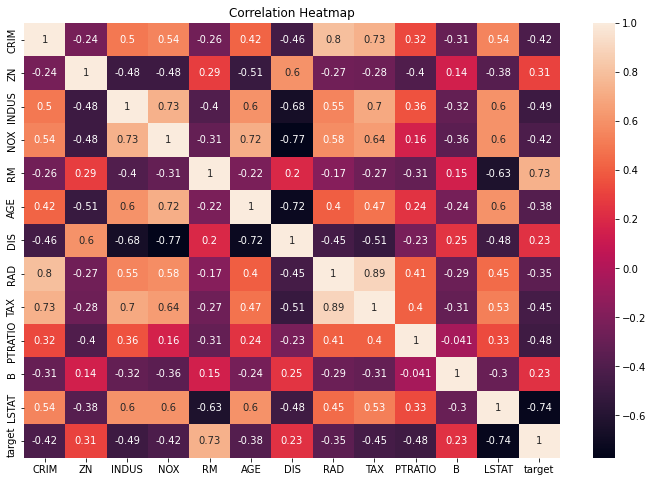

In [194]:
# analyzing how features correlates with one and orther
corr_matrix = data.corr()
# plot heatmap
plt.figure(figsize=(12,8))
ax = sns.heatmap(corr_matrix, annot=True)
ax.set_title("Correlation Heatmap")
plt.plot()

* features like `LSTAT`, `PTRATIO`, `TAX`, `INDUS` and `RM` highly correlates with target variable. (IMP features).
* feature `TAX` and `RAD` have strong correlation index. 
* feature `DIS` and `NOX` have strong correlation index. 
* feature `CHAS` dosen't contribute much to prediction. Need to verify.

[]

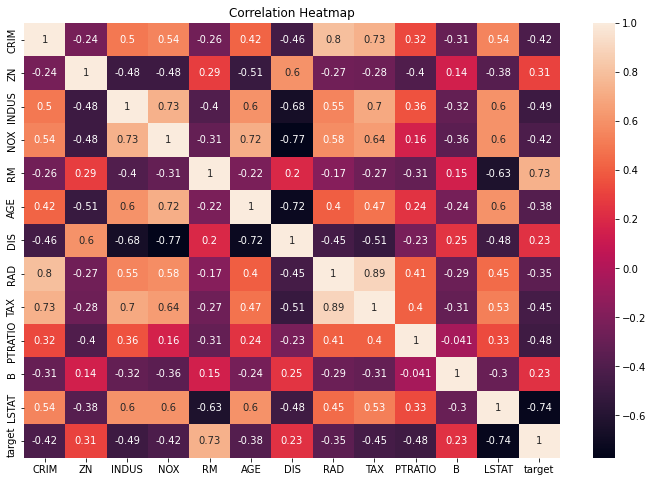

In [195]:
# analyzing how features correlates with one and orther
corr_matrix = data.corr()
# plot correation heatmap
plt.figure(figsize=(12,8))
ax = sns.heatmap(corr_matrix, annot=True)
ax.set_title("Correlation Heatmap")
plt.plot()

* Features like `INDUS`, `RM`, `TAX`, `PTRATIO` and `LSTAT` have high correlation(>.45) with target variable.

In [196]:
# Removing feature either correlation less tha 0.40 with target feature
features_to_remove = ['ZN', 'AGE', 'B']
data.drop(features_to_remove, axis=1, inplace=True)

In [197]:
# Removing skewness
for feature_name in data.columns[:-1]:
    data[feature_name] = data[feature_name] if -0.3 < data[feature_name].skew() < 0.3 else data[feature_name].apply(np.log1p)


##### How high correlated feature contribute to target variable

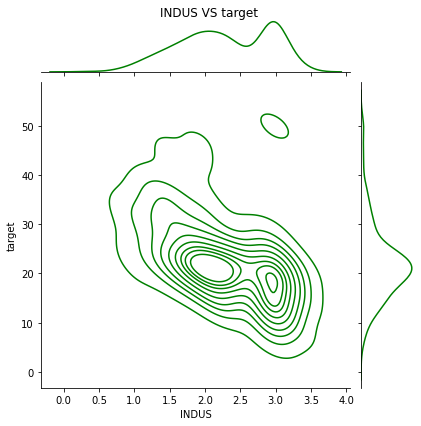

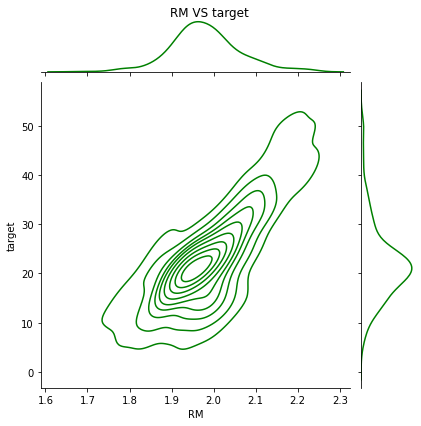

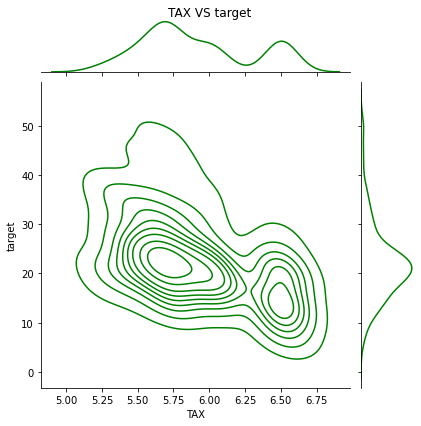

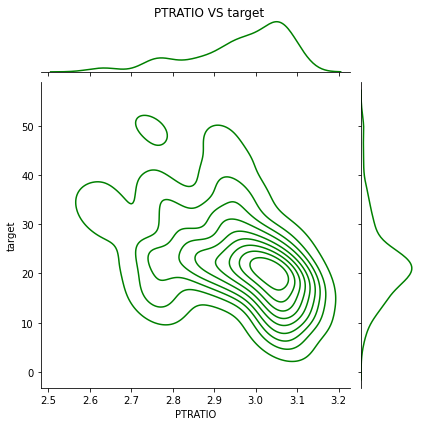

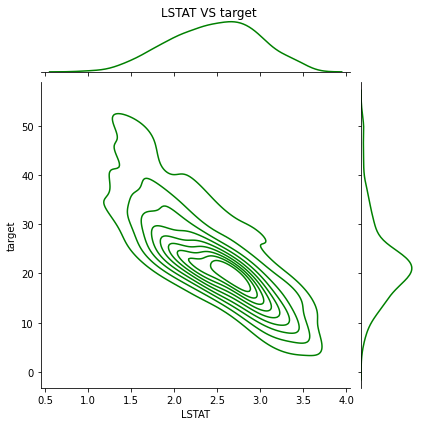

In [198]:

imp_features = ['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
for ii, feature in enumerate(imp_features):
    
    ax = sns.jointplot(feature, 'target', data=data,
              kind="kde", color="g");
    ax.fig.suptitle(f"{feature} VS target")
    ax.fig.subplots_adjust(top=0.95)


In [199]:
# reset index of dataframe
data = data.reset_index(drop=True)

#### Scaling

In [200]:
#standerlizing feature into same scale

## creating feature and target datframe
features = data.drop('target',axis=1)
target = data['target']

# feature Dataframe after Standarlizaion
features = pd.DataFrame(StandardScaler().fit_transform(features),columns=features.columns)
# print top 5 rows of new feature dataframe
features.head()

,CRIM,INDUS,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.759508,-1.705866,-0.050211,0.541925,0.320472,-1.800543,-0.549683,-1.471021,-1.351689
1,-0.736617,-0.307677,-0.710817,0.293975,0.725112,-1.234989,-1.076992,-0.244291,-0.297911
2,-0.736638,-0.307677,-0.710817,1.476888,0.725112,-1.234989,-1.076992,-0.244291,-1.696918
3,-0.731169,-1.768726,-0.818990,1.197887,1.153962,-0.833722,-1.302687,0.157723,-2.184306
4,-0.692454,-1.768726,-0.818990,1.420712,1.153962,-0.833722,-1.302687,0.157723,-1.238184


In [201]:
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [202]:
#save feature and target dataframe
features.to_csv('./data/features_init.csv', index=False)
target.to_csv('./data/target.csv', index=False)

#### dividing data into training and testing data
Now for this dataset, we can see that there are no NaN (missing) values and also all the data is in numbers rather than strings so we won’t face any errors when training the model. So let us just divide our data into training data and testing data such that 70% of data is training data and the rest is testing data. 

In [203]:
# Shuffle and split dataset into train and val
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state=2)


### 3. Choose a Model
For this particular problem, we are going to use four algorithms of supervised learning that can solve regression problems.

#### Linear Regression

In [225]:
lm = LinearRegression()
lm.fit(X_train, y_train)

print('Linear Regression coefficients: {}'.format(lm.coef_))
print('Linear Regression intercept: {}'.format(lm.intercept_))

# model evaluation for training set
y_train_predict = lm.predict(X_train)


# calculating the intercept and slope for the regression line
b, m = np.polynomial.polynomial.polyfit(y_train, y_train_predict, 1)

Linear Regression coefficients: [-1.19237058 -0.43461219 -1.28249355  1.99532108 -2.82830797  2.03729459
 -1.46873254 -1.72330057 -4.43306807]
Linear Regression intercept: 22.37939746081968


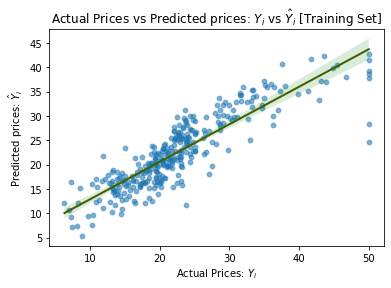

In [221]:
sns.scatterplot(y_train, y_train_predict, alpha=0.4)
sns.regplot(y_train, y_train_predict, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
sns.lineplot(np.unique(y_train), np.unique(np.poly1d(b + m * np.unique(y_train))), linewidth=0.5, color='r')

plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Training Set]")
 
plt.show()

### 4. Evaluating the model
For evaluating the model we are going to use the R_square and mean_squared_error() method from the scikit-learn library. 

In [226]:
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The linear model performance for training set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The linear model performance for training set
RMSE is 3.980665646517504
R2 score is 0.7710482780699368


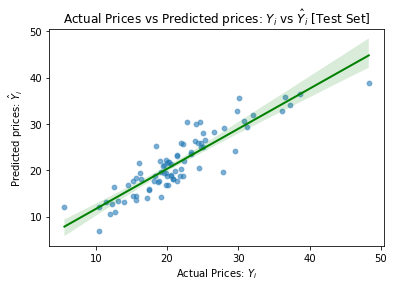

In [227]:
# model evaluation for testing set
y_test_predict = lm.predict(X_test)

sns.scatterplot(y_test, y_test_predict, alpha=0.4)
sns.regplot(y_test, y_test_predict, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

In [228]:
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
 
# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("\nThe linear model performance for testing set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The linear model performance for testing set
RMSE is 3.125971553207074
R2 score is 0.7940285885971254


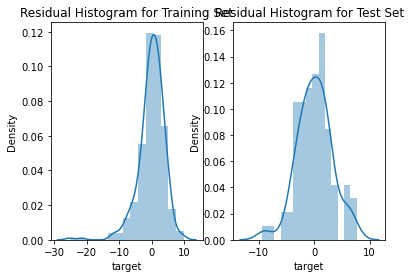

In [230]:
y_train_residual = y_train_predict - y_train
y_test_residual = y_test_predict - y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=15)
plt.title('Residual Histogram for Training Set')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=15)
plt.title('Residual Histogram for Test Set')

plt.show()

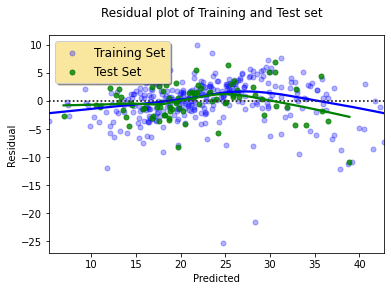

In [231]:
fig, axes = plt.subplots()
fig.suptitle('Residual plot of Training and Test set')

# Plot the residuals after fitting a linear model
sns.residplot(y_train_predict, y_train_residual, lowess=True, color="b", ax=axes, label='Training Set', 
              scatter_kws={'s': 25, 'alpha':0.3})

sns.residplot(y_test_predict, y_test_residual, lowess=True, color="g", ax=axes, label='Test Set',
              scatter_kws={'s': 25})

legend = axes.legend(loc='upper left', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('#f9e79f')

plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

We can conclude that the straight regression line is unable to capture the patterns in the data. This is an example of underfitting. To overcome underfitting, we need to increase the complexity of the model. This could be done by converting the original features into their higher order polynomial terms by using the PolynomialFeatures class provided by scikit-learn. Next, we train the model using Linear Regression.

#### polynomial regression

In [229]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))

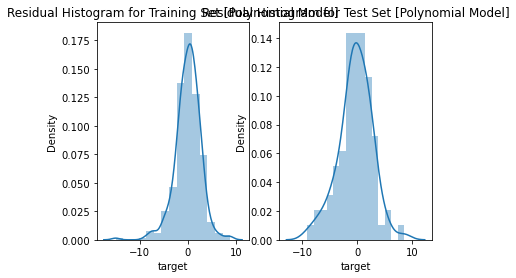

In [232]:
y_train_residual = y_train_predicted - y_train
y_test_residual = y_test_predicted - y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=15)
plt.title('Residual Histogram for Training Set [Polynomial Model]')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=15)
plt.title('Residual Histogram for Test Set [Polynomial Model]')

plt.show()

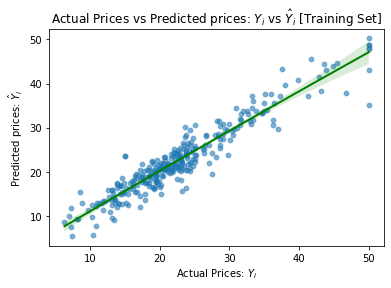

In [233]:
sns.scatterplot(y_train, y_train_predicted, alpha=0.4)
sns.regplot(y_train, y_train_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Training Set]")
 
plt.show()

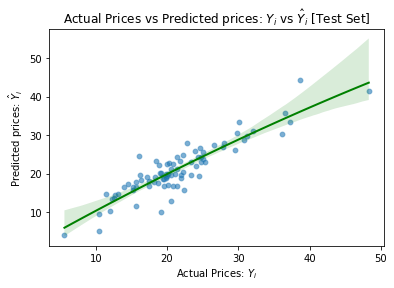

In [234]:
sns.scatterplot(y_test, y_test_predicted, alpha=0.4)
sns.regplot(y_test, y_test_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

In [235]:
# evaluating the model on training data-set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
     
print("The polynomial model performance for the training set")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

The polynomial model performance for the training set
RMSE of training set is 2.6106219823373875
R2 score of training set is 0.9015262461391217


In [236]:
# evaluating the model on test data-set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
r2_test = r2_score(y_test, y_test_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The polynomial model performance for the test set
RMSE of test set is 3.0403295716752656
R2 score of test set is 0.805159951409818


#### Decision Tree Regression

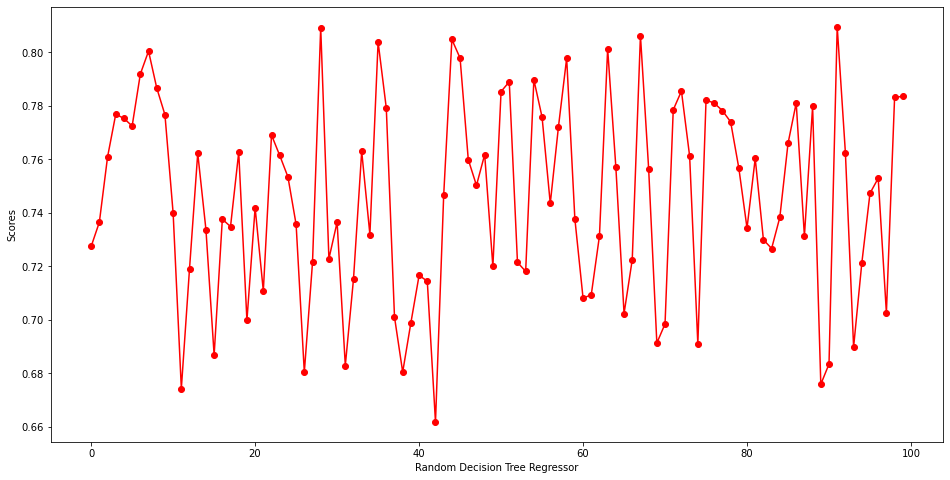

In [207]:
from sklearn.tree import DecisionTreeRegressor
scores = []
for i in range(100):

    dtr_model = DecisionTreeRegressor(max_depth=None, random_state=i)
    dtr_model.fit(X_train, y_train)
    scores.append(r2_score(y_test, dtr_model.predict(X_test)))

plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Random Decision Tree Regressor')
plt.ylabel('Scores')
plt.show()

See how the decision tree score changes for different random states

In [208]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 42)

dtr_model = DecisionTreeRegressor(max_depth=23, random_state=3)
dtr_model.fit(X_train, y_train)
    

print('Training Score : ', dtr_model.score(X_train, y_train))
print('Testing Score  : ', dtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, dtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, dtr_model.predict(X_test)))

Training Score :  1.0
Testing Score  :  0.623187418263587
R2 Score :  0.623187418263587
MSE :  17.876746987951808


In [209]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
adtr_model = make_pipeline(MinMaxScaler(), DecisionTreeRegressor(max_depth = 12, random_state = 92))
adtr_model.fit(X_train, y_train)

print('Training Score : ', adtr_model.score(X_train, y_train))
print('Testing Score  : ', adtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, adtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, adtr_model.predict(X_test)))

Training Score :  0.9985709928931329
Testing Score  :  0.6364905646801227
R2 Score :  0.6364905646801227
MSE :  17.245618957310725


#### K Nearest Neighbors Regression

In [210]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as pyplot
def get_r_squared(max_neighbors=10):
    train_score = []
    test_score = []
    models = []
    for neighbors in range(1, max_neighbors+1):
        model = KNeighborsRegressor(n_neighbors=neighbors)
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))
        models.append(model)
    return train_score, test_score, models

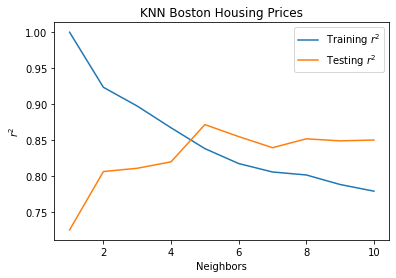

In [211]:
train_score, test_score, models = get_r_squared()
neighbors = range(1, 11)
pyplot.plot(neighbors, train_score, label="Training $r^2$")
pyplot.plot(neighbors, test_score, label="Testing $r^2$")
pyplot.xlabel("Neighbors")
pyplot.ylabel("$r^2$")
pyplot.title("KNN Boston Housing Prices")
pyplot.legend()

In [212]:
print("Training r2 for 2 neigbors: {:.2f}".format(train_score[1]))
print("Testing r2 for 2 neighbors: {:.2f}".format(test_score[1]))


Training r2 for 2 neigbors: 0.92
Testing r2 for 2 neighbors: 0.81


### 6. Prediction
Now we can use the models to predict the prices of the houses using the predict function as we did above. Make sure when predicting the prices that we are given all the features that were present when training the model.

## Conclusion

We achieved a r2 score of above .80, which is a fairly a good number. Analysed different algorithm and chooses best that generalized the data in a good manner. 

The data in which it is trained is of 1978 and guessing the price of house, from the data that is from 1970's is not going to be good prediction.

The features present in dataset are not enough to describe or predict the price of house, as price of houses depend on several other parameter such as area, furnishing, education services,etc

As the data we trained is only from urban city like Boston, and price of house of urban city and rural city are way to different so predicting the value of rural area house from this model might not be a good idea.
